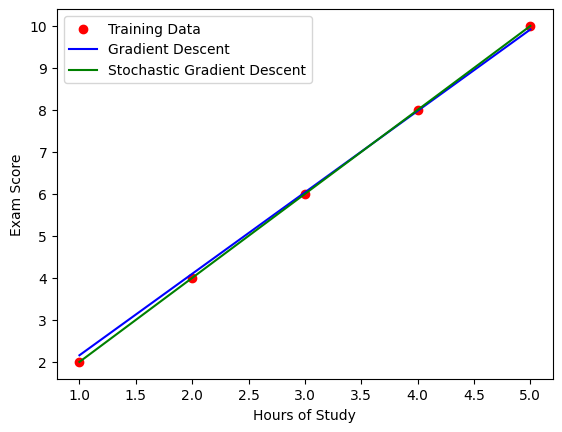

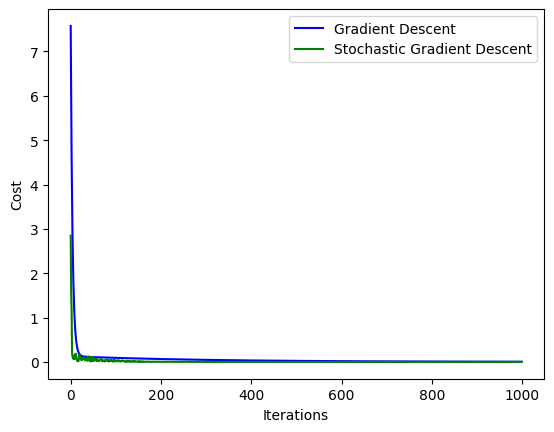

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# 2. Define the gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1 / m) * alpha * (X.T.dot(predictions - y))
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# 3. Define the stochastic gradient descent function
def stochastic_gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        cost = 0.0
        for j in range(m):
            rand_index = np.random.randint(0, m)
            X_i = X[rand_index, :].reshape(1, X.shape[1])
            y_i = y[rand_index].reshape(1, 1)
            prediction = np.dot(X_i, theta)
            theta = theta - alpha * (X_i.T.dot(prediction - y_i))
            cost += compute_cost(X_i, y_i, theta)
        cost_history[i] = cost / m

    return theta, cost_history

# 4. Main script
# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)

# Number of training examples
m = len(y)

# Prepare the data (add a column of ones to X for the intercept term)
X_b = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance
theta = np.random.randn(2, 1)  # Random initialization

# Hyperparameters
alpha = 0.01
iterations = 1000

# 5. Run Gradient Descent
theta_gd, cost_history_gd = gradient_descent(X_b, y, theta, alpha, iterations)

# 6. Run Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_b, y, theta, alpha, iterations)

# 7. Plot the results

# Plot the data points
plt.scatter(X, y, color='red', label='Training Data')

# Plot the regression line for GD
plt.plot(X, X_b.dot(theta_gd), color='blue', label='Gradient Descent')

# Plot the regression line for SGD
plt.plot(X, X_b.dot(theta_sgd), color='green', label='Stochastic Gradient Descent')

plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.legend()
plt.show()

# Plot cost function for Gradient Descent
plt.plot(range(iterations), cost_history_gd, color='blue', label='Gradient Descent')

# Plot cost function for Stochastic Gradient Descent
plt.plot(range(iterations), cost_history_sgd, color='green', label='Stochastic Gradient Descent')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()
